In [ ]:
pip install control #Instalação da biblioteca de sistemas de controle do Python

     |████████████████████████████████| 339 kB 21.5 MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344928 sha256=9d1705bb1afcb9d13b1e212f626c4e2f815e9c9f480e2949fc7be71be3820b1c
  Stored in directory: /root/.cache/pip/wheels/5b/64/54/70faad181d7baff1184541ca00c9a2efa633acd0a811831d30
Successfully built control


# Exemplos

In [ ]:
pip install sympy #Instalação da biblioteca padrão do Python para Matemática simbólica

#Exercício

Represente a função de transferência entre a tensão de entrada e a tensão de saída do circuito apresentado no slide 37 do documento modelagem.pdf. Escolha valores para as resistências e a capacitância, e simule esse sistema para senóides de diferentes frequências. Sugestão: uma frequência menor e outra maior que $\frac{1}{C R_2}$. Apresente no gráfico os sinais de entrada e de saída. Compare qualitativamente as amplitudes e fases da entrada e da saída.

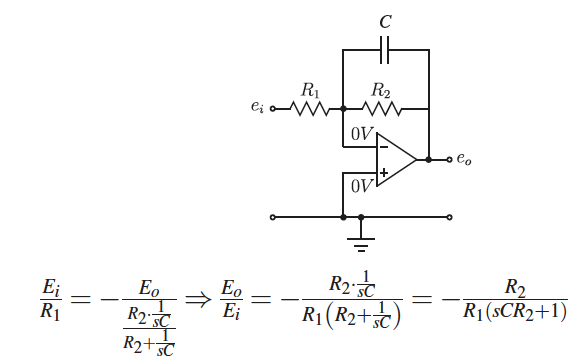

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:294: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


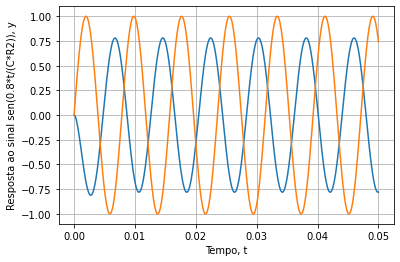

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:294: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


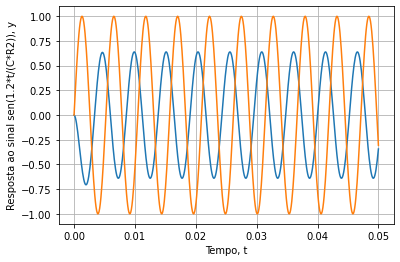

In [ ]:
# Resposta

import numpy as np
from control.matlab import *
import matplotlib.pyplot as plt

s = tf('s')
R1 = 1000 
R2 = 1000
C = 0.000001 # 1u

H = -R2/(R1*(s*C*R2+1))

t = np.linspace(0, 0.05, num = 500)
u1 = np.sin(0.8*(1/(C*R2))*t)
y1,t,x1 = lsim(H, u1, t)
plt.figure(1)
plt.plot(t, y1, t, u1)
plt.grid(True)
plt.xlabel('Tempo, t') 
plt.ylabel('Resposta ao sinal sen(0.8*t/(C*R2)), y')
plt.show()

u2 = np.sin(1.2*(1/(C*R2))*t)
y2,t,x2 = lsim(H, u2, t)
plt.figure(2)
plt.plot(t, y2, t, u2) 
plt.grid(True)
plt.xlabel('Tempo, t') 
plt.ylabel('Resposta ao sinal sen(1.2*t/(C*R2)), y')
plt.show()

#Exemplos

Vamos simular um amplificador não inversor para uma entrada senoidal

O ganho do amplificador não inversor é  1.999960000799984


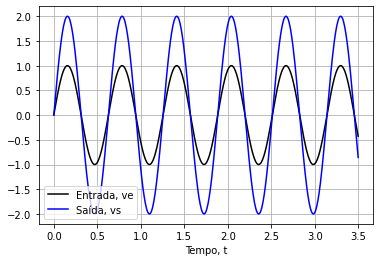

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Definição do ganho T do amplificador não inversor em função do ganho A do 
#amplificador operacional
def T(A):
  R1 = 1000.0 #1 kohms
  R2 = 1000.0 #1 kohms
  return A*(R1+R2)/(R1+R2+A*R1)

A = 100*10.0**3
print('O ganho do amplificador não inversor é ', T(A))

t = np.linspace(0, 3.5, num =500)
ve = np.sin(10*t)
vs = T(A)*ve

plt.figure(1)
plt.plot(t,ve,'k',t,vs,'b')
plt.legend(['Entrada, ve','Saída, vs']) 
plt.grid(True)
plt.xlabel('Tempo, t') 
plt.show()

Vamos comparar os valores dos ganhos do amplificador não inversor e as saídas quando ocorre uma variação de 10% do ganho do amplificador

Para A =  100000.0 , o ganho do amplificador não inversor é  1.999960000799984
Para A =  110000.0 , o ganho do amplificador não inversor é  1.9999636370247813
A variação do ganho do amplificador não inversor é  0.00018181487608806934 %


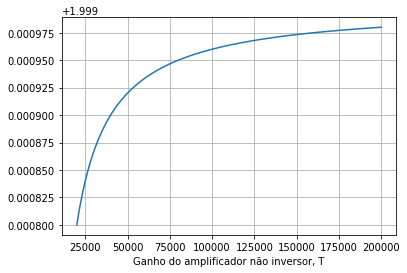

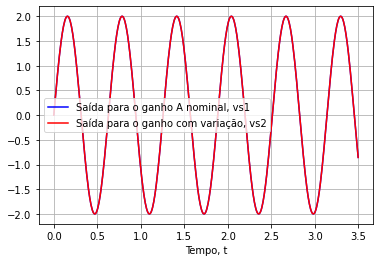

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Definição do ganho T do amplificador não inversor em função do ganho A do 
#amplificador operacional
def T(A):
  R1 = 1000.0 #1 kohms
  R2 = 1000.0 #1 kohms
  return A*(R1+R2)/(R1+R2+A*R1)

Anom = 100*10.0**3 #Valor nominal do ganho do amplificador
print('Para A = ', Anom, ', o ganho do amplificador não inversor é ', T(Anom))

deltaA = 10.0/100.0*Anom #A variação do ganho do amplificador é de 10%
print('Para A = ', Anom+deltaA, ', o ganho do amplificador não inversor é ', T(Anom+deltaA))

print('A variação do ganho do amplificador não inversor é ', 100.0*(T(Anom+deltaA)-T(Anom))/T(Anom) , '%' )

A = np.linspace(20*10.0**3, 200*10.0**3, num =500)
plt.figure(1)
plt.plot(A,T(A))
plt.grid(True)
plt.xlabel('Ganho do amplificador operacional, A') 
plt.xlabel('Ganho do amplificador não inversor, T') 
plt.show()

t = np.linspace(0, 3.5, num =500)
ve = np.sin(10*t)

vs1 = T(Anom)*ve
vs2 = T(Anom+deltaA)*ve

plt.figure(2)
plt.plot(t,vs1,'b',t,vs2,'r')
plt.legend(['Saída para o ganho A nominal, vs1','Saída para o ganho com variação, vs2']) 
plt.grid(True)
plt.xlabel('Tempo, t') 
plt.show()

Vamos determinar a sensibilidade do ganho $T = \frac{A\left( R_{1}+R_{2}\right) }{\left(
R_{1}+R_{2}+AR_{1}\right) }$ do amplificador não inversor em relação ao ganho $A$ do amplificador operacional.

In [ ]:
import sympy as sp
import matplotlib.pyplot as plt

#Definição do ganho T do amplificador não inversor em função do ganho A do 
#amplificador operacional
def T(A):
  R1 = 1000.0 #1 kohms
  R2 = 1000.0 #1 kohms
  return A*(R1+R2)/(R1+R2+A*R1)

#Definição de A como um símbolo
A = sp.Symbol('A')

#Cálculo o valor da derivada parcial de T em relação a A para A = 100000V/V
parcialT = sp.Derivative(T(A), A).doit().subs({A:100*10.0**3})

#Cálculo da sensibilidade do ganho T do amplificador não inversor
#em relação ao ganho A do amplificador operacional para A = 100000V/V
A = 100*10.0**3
S = A/T(A)*parcialT

print('A sensibilidade é igual a', S)

variacalA = 10 # %
variacalT = S*variacalA

print('A variação de T é', variacalT, '%')


A sensibilidade é igual a 1.99996000080125e-5
A variação de T é 0.000199996000080125 %


# Exercício

Como apresentado no slide 13 do arquivo Modelagem.pdf, o 
ganho $T$ do amplificador inversor é $-\frac{AR_2}{R_1 + R_2 + AR_1}$, em que $R_1$ e $R_2$ são valores de resistências, e $A$ é o ganho do amplificador operacional. Considere $R_1 = R_2 = 1000 \Omega$ e $A = 100000V/V$. Por meio da sensibilidade $\mathcal{S}^T_A$, determine o efeito de uma variação de $10\%$ do ganho $A$ do amplificador operacional sobre o ganho $T$ do amplificador inversor. Simule o amplificador inversor para uma entrada senoidal utilizando o ganho nominal do aplificador operacional e o ganho com variação.

A sensibilidade é igual a 1.99996000080125e-5
A variação de T é 0.000199996000080125 %


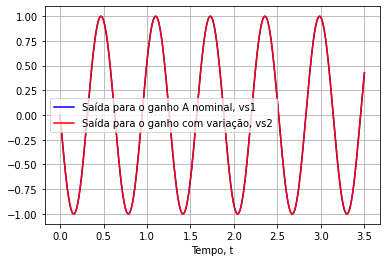

In [ ]:
#Resposta
import sympy as sp
import matplotlib.pyplot as plt

#Definição do ganho T do amplificador não inversor em função do ganho A do 
#amplificador operacional
def T(A):
  R1 = 1000.0 #1 kohms
  R2 = 1000.0 #1 kohms
  return -A*R2/(R1+R2+A*R1)

#Definição de A como um símbolo
A = sp.Symbol('A')

#Cálculo o valor da derivada parcial de T em relação a A para A = 400000V/V
parcialT = sp.Derivative(T(A), A).doit().subs({A:100*10.0**3})

#Cálculo da sensibilidade do ganho T do amplificador não inversor
#em relação ao ganho A do amplificador operacional para A = 400000V/V
A = 100*10.0**3
S = A/T(A)*parcialT

print('A sensibilidade é igual a', S)

variacalA = 10 # %
variacalT = S*variacalA

print('A variação de T é', variacalT, '%')

t = np.linspace(0, 3.5, num = 500)
ve = np.sin(10*t)

vs1 = T(A)*ve
vs2 = T(A + variacalT*100)*ve

plt.figure(1)
plt.plot(t,vs1,'b',t,vs2,'r')
plt.legend(['Saída para o ganho A nominal, vs1','Saída para o ganho com variação, vs2']) 
plt.grid(True)
plt.xlabel('Tempo, t') 
plt.show()

#Exemplos

Vamos simular um sistema massa-mola-amortecedor.

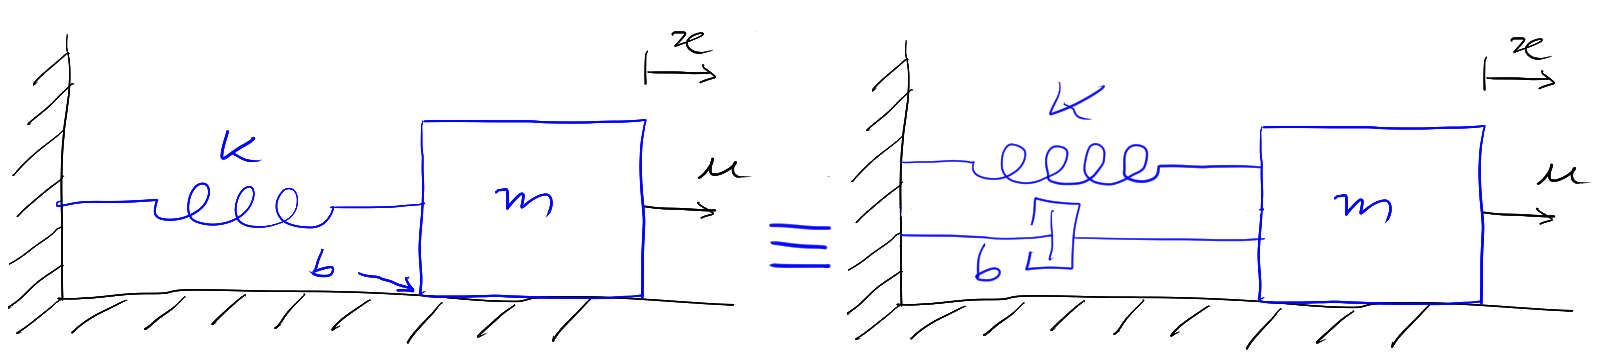

A = [[  0.    1. ]
     [-10.   -0.5]]

B = [[0.]
     [1.]]

C = [[1. 0.]]

D = [[0.]]



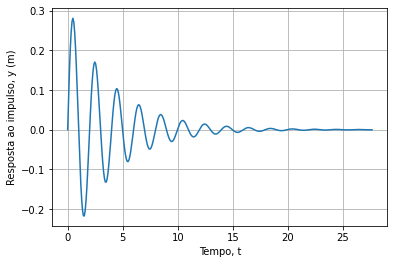

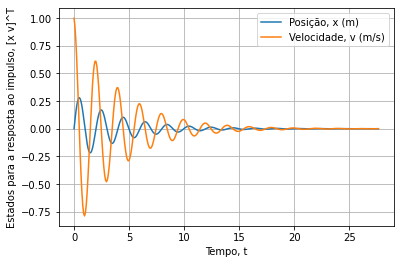

In [ ]:
#Simulação de um sistema massa-mola-amortecedor
from control.matlab import *
from numpy import *
import matplotlib.pyplot as plt

#Parâmetros
m =  1.0 #massa (kg)
k = 10.0 #constante de elasticidade (N/m)
b =  0.5 #constante de atrito viscoso (Ns/m)

A = matrix([[ 0,  1],
           [-k/m, -b/m]])
B = matrix([[0],
           [1/m]])
C = matrix([[1, 0]])
d = matrix([0])
Hss=ss(A, B, C, d)
print(Hss)

y,t,x = impulse(Hss, return_x=True)
plt.figure(1)
plt.plot(t,y) 
plt.grid(True)
plt.xlabel('Tempo, t') 
plt.ylabel('Resposta ao impulso, y (m)')
plt.show()

plt.figure(2)
plt.plot(t,x) 
plt.grid(True)
plt.legend(['Posição, x (m)','Velocidade, v (m/s)'])
plt.xlabel('Tempo, t') 
plt.ylabel('Estados para a resposta ao impulso, [x v]^T')
plt.show()

#Exercício

Considere um motor de corrente contínua em que, a resistência de armadura $R_a = 1\Omega$, a indutância de armadura $L_a = 10mH$, a constante elétrica e a constante de torque $K_\omega = K_i = 0.1 N\cdot m / A$, o momento de inércia do rotor $J = 4kg \cdot m^2$, e o coeficiente de atrito viscoso $F=3N \cdot m \cdot s/rad$. O torque de carga $c_m = 0$. Determine a representação do sistema em variáveis de estado. A saída do sistema é a velocidade angular do rotor $\omega_m$. Simule esse sistema para a tensão de armadura $v_a(t)$ igual a um degrau unitário. Apresente os estados do sistema. Quais são as suas conclusões sobre os regimes transitório e permanente de cada estado. Relacione essas conclusões com a dinâmica eletro-mecânica do motor.

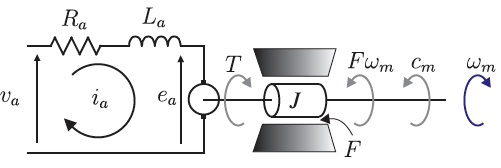

A = [[-1.0e+03 -1.0e+02]
     [-2.5e-02 -7.5e-01]]

B = [[1000.]
     [   0.]]

C = [[ 0.   -0.25]]

D = [[0.]]



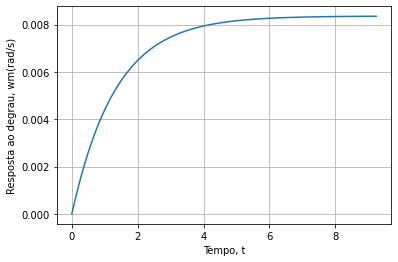

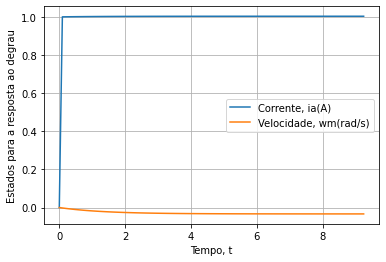

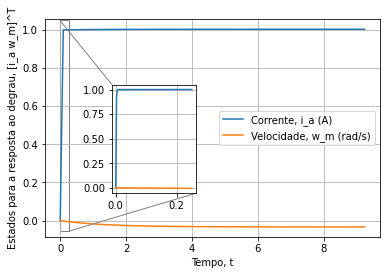

In [ ]:
#Resposta
from control.matlab import *
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)

#Parâmetros
Ra =  1.0 
La = 0.001 
Kw =  0.1
Ki = 0.1
J = 4
Fat = 3 

A = matrix([[ -Ra/La, -Kw/La],
           [-Ki/J, -Fat/J]])
B = matrix([[1/La],
           [0]])
C = matrix([0, -1/J])
d = matrix([0])
Hss=ss(A, B, C, d)
print(Hss)

y,t,x = step(Hss, return_x = True)
plt.figure(1)
plt.plot(t,y) 
plt.grid(True)
plt.xlabel('Tempo, t') 
plt.ylabel('Resposta ao degrau, wm(rad/s)')
plt.show()

plt.figure(2)
plt.plot(t,x) 
plt.grid(True)
plt.legend(['Corrente, ia(A)','Velocidade, wm(rad/s)'])
plt.xlabel('Tempo, t') 
plt.ylabel('Estados para a resposta ao degrau')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(t,x)
plt.grid(True)
plt.legend(['Corrente, i_a (A)','Velocidade, w_m (rad/s)'])
plt.xlabel('Tempo, t')
plt.ylabel('Estados para a resposta ao degrau, [i_a w_m]^T')

# Create a set of inset Axes: these should fill the bounding box allocated to
# them.
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.2,0.2,0.25,0.5])
ax2.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 and draw lines
# in grey linking the two axes.
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.5')
y,t,x = step(Hss, T = 0.25, return_x=True)
ax2.plot(t,x)
plt.grid(True)
plt.show()

#Exemplo

Vamos simular um pêndulo simples.

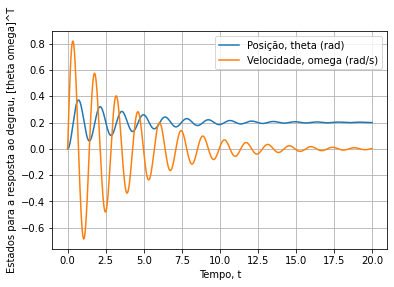

In [ ]:
#Representação e resolução de uma equação diferencial
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#Parâmetros
m =  1.0 #massa (kg)
g = 10.0 #aceleração gravitacional (m/s^2)
l =  0.5 #comprimento da haste do pêndulo (m)
b =  0.5 #coeficiente de atrito viscoso (Ns/m)

def u(t):
    return 1

# Função que retorna dy/dt
def f(x,t):
    dxdt = [0, 0]
    dxdt[0] = x[1]
    dxdt[1] = -g/l*np.sin(x[0]) - b/m*x[1] + 1/(m * l**2)*u(t)
    return dxdt

# Condição inicial
x0 = [0, 0]

# Vetor de tempo
t = np.linspace(0, 20, num = 500)

# Resolver a equação diferencial ordinária
x = odeint(f, x0, t)

# Apresentar os resultados
plt.figure(1)
plt.plot(t,x) 
plt.grid(True)
plt.legend(['Posição, theta (rad)','Velocidade, omega (rad/s)'])
plt.xlabel('Tempo, t') 
plt.ylabel('Estados para a resposta ao degrau, [theta omega]^T')
plt.show()

# Exercício

Considere o sistema de um tanque, em que a área da base do tanque é $100 cm^2$, $\alpha = 2$, o número de Reynolds $R_s = 30g^{-\frac{1}{2}}cm^{-\frac{1}{2}}$, as densidades do fluxo de entrada $\rho_e$ e do fluxo de saída $\rho_s$ são iguais à densidade da água, que é igual a $1\mbox{g}/cm^3$, a aceleração da gravidade é $1000cm/s^2$. A saída do sistema $y$ é o nível $h$ da água no tanque. Determine a equação diferencial relacionando o fluxo de entrada $w_{e}$ com o nível $h$. Determine algebricamente o valor em regime permanente do nível $h$ que corresponde ao fluxo de entrada no primeiro tanque $w_{in} = 1$ g/s. Simule o tanque para uma entrada degrau unitário. O nível inicial é 0. Quais são as suas conclusões sobre o regime transitório e o regime permanente do tanque?

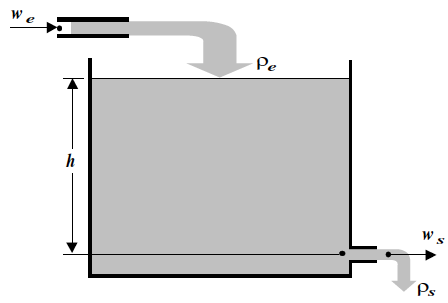

In [ ]:
#Resposta